In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

# 반달 모양 두 개의 클래스 데이터 생성
data, cls = make_moons(n_samples=300, noise=0.05, random_state=1234)

df = pd.DataFrame(data, columns=["X", "Y"])
df.head()

,X,Y
0,0.021584,0.204225
1,0.484300,-0.392534
2,0.075986,1.008658
3,-0.002046,0.223251
4,-0.717494,0.606368


In [10]:
from sklearn.cluster import AgglomerativeClustering

# 2개의 군집
# 맨해튼 거리(=L1 norm)를 기준으로, 
# linkage = single, complete, average, ward
# 군집 간 거리 기준 : 두 군집에 포함되는 각 관측치들이 이루는 거리 중 가장 긴 거리 = complete linkage
ac = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')
df['label'] = ac.fit_predict(df) # 트리 기반으로 한 번 게산, 비재사용성 군집 알고리즘

df.head()

,X,Y,label
0,0.021584,0.204225,0
1,0.484300,-0.392534,1
2,0.075986,1.008658,0
3,-0.002046,0.223251,0
4,-0.717494,0.606368,0


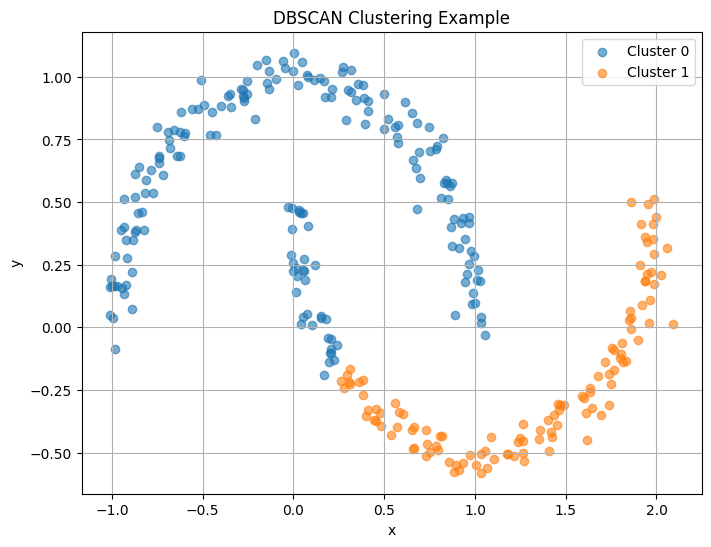

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for label in sorted(df['label'].unique()):
    cluster = df[df['label'] == label]
    plt.scatter(cluster['X'], cluster['Y'], label=f'Cluster {label}', alpha=0.6)
plt.legend()

plt.title('DBSCAN Clustering Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [18]:
# 민코프스키 거리 
# affinity에서 따로 설정 불가, precomputed로 설정하여 계산된 값을 전달
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

distance_matrix = squareform(pdist(data, metric='minkowski', p=1)) # manhattan(p=1), euclidean(p=2)
ac = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
df['label'] = ac.fit_predict(distance_matrix)
df.head()

,X,Y,label
0,0.021584,0.204225,0
1,0.484300,-0.392534,1
2,0.075986,1.008658,0
3,-0.002046,0.223251,0
4,-0.717494,0.606368,0


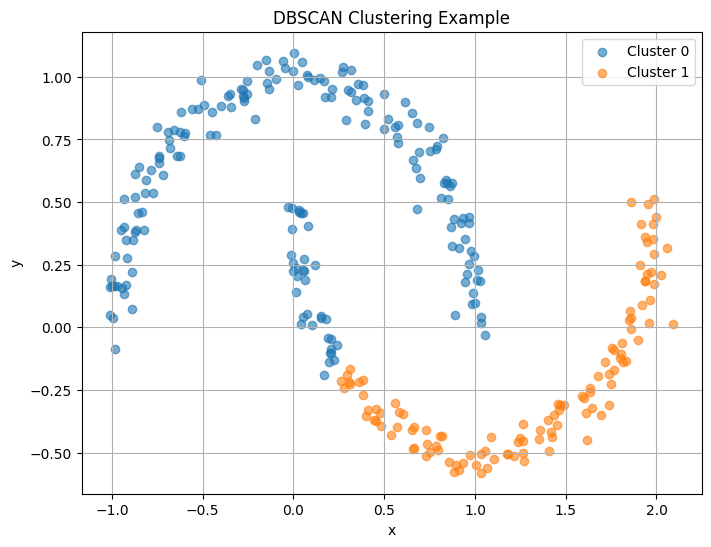

In [19]:
plt.figure(figsize=(8, 6))
for label in sorted(df['label'].unique()):
    cluster = df[df['label'] == label]
    plt.scatter(cluster['X'], cluster['Y'], label=f'Cluster {label}', alpha=0.6)
plt.legend()

plt.title('DBSCAN Clustering Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()